In [1]:
import pandas as pd
import numpy as np
import datetime


In [2]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

    
train = train.append(test[test.x_exit==test.x_exit])
columns=[#'hash', 'trajectory_id', 
         'time_entry', 'time_exit', 
    'vmax', 'vmin','vmean', 
    'x_entry', 'y_entry', 'first', 'last',
       'x_req', 'y_req', 'x_start', 'y_start', 'distance', 'time_start',
       'time_delta', 'time_total', 'city_start', 'city_now', 'city_was',
       'x_dir', 'y_dir', 'len',
         'distance_to_city', 'speed',
    #'x_exit', 'y_exit', 
        ]
x_train, x_test = pd.DataFrame(), pd.DataFrame()
x_train = train[columns]
x_test = test2[columns]


y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [3]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983684 entries, 0 to 202935
Data columns (total 25 columns):
time_entry          983684 non-null int64
time_exit           983684 non-null int64
vmax                311474 non-null float64
vmin                311474 non-null float64
vmean               328137 non-null float64
x_entry             983684 non-null float64
y_entry             983684 non-null float64
first               983684 non-null bool
last                983684 non-null bool
x_req               983684 non-null float64
y_req               983684 non-null float64
x_start             983684 non-null float64
y_start             983684 non-null float64
distance            983684 non-null float64
time_start          983684 non-null int64
time_delta          983684 non-null int64
time_total          983684 non-null int64
city_start          983684 non-null bool
city_now            983684 non-null bool
city_was            983684 non-null bool
x_dir               983684 non-nul

In [4]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983684 entries, 0 to 983683
Data columns (total 1 columns):
y    983684 non-null int64
dtypes: int64(1)
memory usage: 7.5 MB


In [5]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.patches as patches

new_columns=['cluster_V','cluster_times','cluster_location','cluster_road','cluster_connection','cluster_acceleration']
metric_columns=[['vmax', 'vmin','vmean'],
                ['time_entry', 'time_exit', 'time_start','time_delta', 'time_total'],
                ['len','distance_to_city','distance'],
                ['x_entry','y_entry'],
                ['x_start','y_start','x_entry','y_entry'],
                ['vmean','speed']
               ]

model_columns=[ MiniBatchKMeans(n_clusters=2,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                MiniBatchKMeans(n_clusters=128,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                MiniBatchKMeans(n_clusters=64,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                DBSCAN(eps=190,min_samples=40,n_jobs=-1),
                MiniBatchKMeans(n_clusters=10,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                MiniBatchKMeans(n_clusters=2,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
              ]
for new,metric,model in zip(new_columns,metric_columns,model_columns):
    data=train[metric]
    trainend=np.shape(data)[0]
    data=data.append(test2[metric])

    for col in metric:
        mode = data[col].mode()[0]
        data[col].fillna(mode, inplace=True)
    c = model.fit_predict(data)

    labels=list(np.unique(c))
    clusters=len(labels)
    train_c=c[:trainend]
    test2_c=c[trainend:]
    x_train[new]=train_c
    x_test[new]=test2_c




Init 1/3 with method: k-means++
Inertia for init 1/3: 38830.529718
Init 2/3 with method: k-means++
Inertia for init 2/3: 37794.950804
Init 3/3 with method: k-means++
Inertia for init 3/3: 48074.132026
Minibatch iteration 1/101800: mean batch inertia: 10.578943, ewa inertia: 10.578943 
Minibatch iteration 2/101800: mean batch inertia: 13.020268, ewa inertia: 10.583743 
Minibatch iteration 3/101800: mean batch inertia: 10.984606, ewa inertia: 10.584531 
Minibatch iteration 4/101800: mean batch inertia: 8.950287, ewa inertia: 10.581318 
Minibatch iteration 5/101800: mean batch inertia: 8.783101, ewa inertia: 10.577782 
Minibatch iteration 6/101800: mean batch inertia: 10.019570, ewa inertia: 10.576684 
Minibatch iteration 7/101800: mean batch inertia: 8.460899, ewa inertia: 10.572524 
Minibatch iteration 8/101800: mean batch inertia: 21.924294, ewa inertia: 10.594844 
Minibatch iteration 9/101800: mean batch inertia: 40.263225, ewa inertia: 10.653177 
Minibatch iteration 10/101800: mean b

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Init 1/3 with method: k-means++
Inertia for init 1/3: 15113367558.747671
Init 2/3 with method: k-means++
Inertia for init 2/3: 14932931687.611032
Init 3/3 with method: k-means++
Inertia for init 3/3: 15110702084.856085
Minibatch iteration 1/101800: mean batch inertia: 5188261.759303, ewa inertia: 5188261.759303 
Minibatch iteration 2/101800: mean batch inertia: 5239104.501485, ewa inertia: 5188361.725371 
Minibatch iteration 3/101800: mean batch inertia: 5584537.936597, ewa inertia: 5189140.679777 
Minibatch iteration 4/101800: mean batch inertia: 5121478.263625, ewa inertia: 5189007.643175 
Minibatch iteration 5/101800: mean batch inertia: 5467917.923930, ewa inertia: 5189556.031458 
Minibatch iteration 6/101800: mean batch inertia: 5270869.528876, ewa inertia: 5189715.908566 
Minibatch iteration 7/101800: mean batch inertia: 5172380.955606, ewa inertia: 5189681.824899 
Minibatch iteration 8/101800: mean batch inertia: 5011397.000575, ewa inertia: 5189331.284545 
Minibatch iteration 9

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Init 1/3 with method: k-means++
Inertia for init 1/3: 1565032385539.371826
Init 2/3 with method: k-means++
Inertia for init 2/3: 1521017843097.616699
Init 3/3 with method: k-means++
Inertia for init 3/3: 1540768357932.759521
Minibatch iteration 1/101800: mean batch inertia: 598637643.141332, ewa inertia: 598637643.141332 
Minibatch iteration 2/101800: mean batch inertia: 558749943.284858, ewa inertia: 598559216.676809 
Minibatch iteration 3/101800: mean batch inertia: 555895540.240013, ewa inertia: 598475332.138002 
Minibatch iteration 4/101800: mean batch inertia: 530979868.912364, ewa inertia: 598342623.795050 
Minibatch iteration 5/101800: mean batch inertia: 569743781.530700, ewa inertia: 598286393.275458 
Minibatch iteration 6/101800: mean batch inertia: 543432279.298372, ewa inertia: 598178540.121748 
Minibatch iteration 7/101800: mean batch inertia: 503779171.768984, ewa inertia: 597992933.813543 
Minibatch iteration 8/101800: mean batch inertia: 572813711.897166, ewa inertia: 5

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Init 1/3 with method: k-means++
Inertia for init 1/3: 4729236367343.250000
Init 2/3 with method: k-means++
Inertia for init 2/3: 3759479024173.125000
Init 3/3 with method: k-means++
Inertia for init 3/3: 3813478122437.250000
Minibatch iteration 1/101800: mean batch inertia: 1344343963.379750, ewa inertia: 1344343963.379750 
Minibatch iteration 2/101800: mean batch inertia: 1214052994.321250, ewa inertia: 1344087787.663945 
Minibatch iteration 3/101800: mean batch inertia: 1263632410.387250, ewa inertia: 1343929597.775473 
Minibatch iteration 4/101800: mean batch inertia: 1198142562.691125, ewa inertia: 1343642953.978611 
Minibatch iteration 5/101800: mean batch inertia: 1193017539.030750, ewa inertia: 1343346797.047923 
Minibatch iteration 6/101800: mean batch inertia: 1205904608.759750, ewa inertia: 1343076560.735913 
Minibatch iteration 7/101800: mean batch inertia: 1239913617.495250, ewa inertia: 1342873723.647355 
Minibatch iteration 8/101800: mean batch inertia: 1205056514.505375,

Minibatch iteration 118/101800: mean batch inertia: 1143297152.622125, ewa inertia: 1311297906.061772 
Minibatch iteration 119/101800: mean batch inertia: 1117546873.434625, ewa inertia: 1310916956.331872 
Minibatch iteration 120/101800: mean batch inertia: 1176979676.859500, ewa inertia: 1310653611.307349 
Minibatch iteration 121/101800: mean batch inertia: 1168550072.208750, ewa inertia: 1310374209.932794 
Minibatch iteration 122/101800: mean batch inertia: 1137186031.893250, ewa inertia: 1310033690.510774 
Minibatch iteration 123/101800: mean batch inertia: 1266034026.962250, ewa inertia: 1309947179.178590 
Minibatch iteration 124/101800: mean batch inertia: 1133678267.777625, ewa inertia: 1309600602.475089 
Minibatch iteration 125/101800: mean batch inertia: 1196352177.690375, ewa inertia: 1309377935.497533 
Minibatch iteration 126/101800: mean batch inertia: 1206804727.711500, ewa inertia: 1309176257.936019 
Minibatch iteration 127/101800: mean batch inertia: 1137230220.005125, ew

Minibatch iteration 250/101800: mean batch inertia: 1126009683.336625, ewa inertia: 1279250969.730428 
Minibatch iteration 251/101800: mean batch inertia: 1255299527.238625, ewa inertia: 1279203876.843106 
Minibatch iteration 252/101800: mean batch inertia: 1184922313.835625, ewa inertia: 1279018502.161613 
Minibatch iteration 253/101800: mean batch inertia: 1139237145.260625, ewa inertia: 1278743666.619141 
Minibatch iteration 254/101800: mean batch inertia: 1179139885.195750, ewa inertia: 1278547827.489327 
Minibatch iteration 255/101800: mean batch inertia: 1140553695.659750, ewa inertia: 1278276505.956041 
Minibatch iteration 256/101800: mean batch inertia: 1148837679.569000, ewa inertia: 1278022005.707541 
Minibatch iteration 257/101800: mean batch inertia: 1217017761.725000, ewa inertia: 1277902060.280914 
Minibatch iteration 258/101800: mean batch inertia: 1155495856.450875, ewa inertia: 1277661387.446014 
Minibatch iteration 259/101800: mean batch inertia: 1226630605.344500, ew

Minibatch iteration 382/101800: mean batch inertia: 1318564962.233875, ewa inertia: 1255548331.308396 
Minibatch iteration 383/101800: mean batch inertia: 1203786038.640500, ewa inertia: 1255446557.237087 
Minibatch iteration 384/101800: mean batch inertia: 1161836432.367250, ewa inertia: 1255262502.724956 
Minibatch iteration 385/101800: mean batch inertia: 1143846524.136875, ewa inertia: 1255043438.669533 
Minibatch iteration 386/101800: mean batch inertia: 1204747911.916500, ewa inertia: 1254944548.526487 
Minibatch iteration 387/101800: mean batch inertia: 1143780940.318750, ewa inertia: 1254725980.677082 
Minibatch iteration 388/101800: mean batch inertia: 1245179485.572125, ewa inertia: 1254707210.533344 
Minibatch iteration 389/101800: mean batch inertia: 1099828663.346750, ewa inertia: 1254402691.171986 
Minibatch iteration 390/101800: mean batch inertia: 1159076085.362500, ewa inertia: 1254215261.746486 
Minibatch iteration 391/101800: mean batch inertia: 1227731613.239250, ew

Minibatch iteration 516/101800: mean batch inertia: 1201336949.560250, ewa inertia: 1236946984.349785 
Minibatch iteration 517/101800: mean batch inertia: 1164043442.343375, ewa inertia: 1236803642.741436 
Minibatch iteration 518/101800: mean batch inertia: 1205830546.881250, ewa inertia: 1236742744.007932 
Minibatch iteration 519/101800: mean batch inertia: 1171950477.242375, ewa inertia: 1236615350.640323 
Minibatch iteration 520/101800: mean batch inertia: 1138279617.862750, ewa inertia: 1236422004.724520 
Minibatch iteration 521/101800: mean batch inertia: 1123938932.962375, ewa inertia: 1236200842.570052 
Minibatch iteration 522/101800: mean batch inertia: 1176300144.389625, ewa inertia: 1236083066.914959 
Minibatch iteration 523/101800: mean batch inertia: 1144874109.497750, ewa inertia: 1235903733.534273 
Minibatch iteration 524/101800: mean batch inertia: 1140030160.771375, ewa inertia: 1235715228.672372 
Minibatch iteration 525/101800: mean batch inertia: 1241018057.761000, ew

Minibatch iteration 659/101800: mean batch inertia: 1150309054.459375, ewa inertia: 1222714364.421221 
Minibatch iteration 660/101800: mean batch inertia: 1158972982.328250, ewa inertia: 1222589037.283798 
Minibatch iteration 661/101800: mean batch inertia: 1218585523.213375, ewa inertia: 1222581165.647797 
Minibatch iteration 662/101800: mean batch inertia: 1235261239.224750, ewa inertia: 1222606096.976104 
Minibatch iteration 663/101800: mean batch inertia: 1164199160.454750, ewa inertia: 1222491258.327811 
Minibatch iteration 664/101800: mean batch inertia: 1118035469.511000, ewa inertia: 1222285879.269973 
Minibatch iteration 665/101800: mean batch inertia: 1174997097.771500, ewa inertia: 1222192900.934349 
Minibatch iteration 666/101800: mean batch inertia: 1223373447.848000, ewa inertia: 1222195222.104057 
Minibatch iteration 667/101800: mean batch inertia: 1152517005.514500, ewa inertia: 1222058222.071439 
Minibatch iteration 668/101800: mean batch inertia: 1097600045.315250, ew

Minibatch iteration 797/101800: mean batch inertia: 1278770152.448125, ewa inertia: 1209988871.973288 
Minibatch iteration 798/101800: mean batch inertia: 1211093210.773625, ewa inertia: 1209991043.304000 
Minibatch iteration 799/101800: mean batch inertia: 1237087490.128250, ewa inertia: 1210044319.841208 
Minibatch iteration 800/101800: mean batch inertia: 1125306145.131750, ewa inertia: 1209877709.194906 
Minibatch iteration 801/101800: mean batch inertia: 1187876816.193125, ewa inertia: 1209834451.442248 
Minibatch iteration 802/101800: mean batch inertia: 1138853910.109625, ewa inertia: 1209694890.802585 
Minibatch iteration 803/101800: mean batch inertia: 1178396638.382750, ewa inertia: 1209633352.752212 
Minibatch iteration 804/101800: mean batch inertia: 1194898228.435750, ewa inertia: 1209604380.820799 
Minibatch iteration 805/101800: mean batch inertia: 1213201880.115750, ewa inertia: 1209611454.157989 
Minibatch iteration 806/101800: mean batch inertia: 1161163993.580250, ew

Minibatch iteration 934/101800: mean batch inertia: 1233351021.007625, ewa inertia: 1200406966.635281 
Minibatch iteration 935/101800: mean batch inertia: 1151082632.780125, ewa inertia: 1200309986.033914 
Minibatch iteration 936/101800: mean batch inertia: 1130483068.967000, ewa inertia: 1200172693.629143 
Minibatch iteration 937/101800: mean batch inertia: 1196851696.192375, ewa inertia: 1200166163.944839 
Minibatch iteration 938/101800: mean batch inertia: 1126309640.088500, ewa inertia: 1200020948.601040 
Minibatch iteration 939/101800: mean batch inertia: 1206952815.434375, ewa inertia: 1200034577.910582 
Minibatch iteration 940/101800: mean batch inertia: 1177222606.337625, ewa inertia: 1199989725.430101 
Minibatch iteration 941/101800: mean batch inertia: 1093246426.379625, ewa inertia: 1199779848.711559 
Minibatch iteration 942/101800: mean batch inertia: 1137043429.849875, ewa inertia: 1199656497.514426 
Minibatch iteration 943/101800: mean batch inertia: 1155676957.986375, ew

In [6]:
x_train.head()

time_entry  time_exit  vmax  vmin  vmean       x_entry       y_entry  \
0       25471      25712   NaN   NaN    NaN  3.751014e+06 -1.909398e+07   
1       26434      26742   NaN   NaN    NaN  3.743937e+06 -1.932247e+07   
2       28412      29005   NaN   NaN    NaN  3.744868e+06 -1.929356e+07   
3       29870      31043   NaN   NaN    NaN  3.744880e+06 -1.929229e+07   
4       52689      52689   NaN   NaN    NaN  3.744909e+06 -1.928558e+07   

   first   last         x_req          ...                  y_dir  len  \
0   True  False  3.751014e+06          ...          -42359.276973    1   
1  False  False  3.751014e+06          ...          -42359.276973    2   
2  False  False  3.743937e+06          ...            2803.848719    3   
3  False  False  3.744868e+06          ...             723.769955    4   
4  False  False  3.744880e+06          ...            1803.169939    5   

   distance_to_city       speed  cluster_V  cluster_times  cluster_location  \
0     434887.327822         NaN          0             48                 5   
1     251259.147958  179.855597          0             79                60   
2     164759.949137   72.867591          0              4                60   
3     160951.840984   46.444595          0             62                60   
4     140948.372163    9.754358          0             74                36   

   cluster_road  cluster_connection  cluster_acceleration  
0            -1                   5                     0  
1            -1                   6                     1  
2             0                   6                     1  
3             0                   6                     1  
4             1                   6                     0  

[5 rows x 31 columns]

In [7]:
def plot_clusters(col):
    data=train[['x_entry','y_entry']]
    data['c']=x_train[col]

    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(16)
    
    labels=list(np.unique(data['c'].values))
    
    # Plot
    for c in labels:
        ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5,
                   #label=str('c'+str(c))
                  )

    # Create a Rectangle patch
    rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    

    ax.set(xlabel='x', ylabel='y',
           title=col)

    plt.show()


In [8]:
def plotmap(ycity,title):
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(16)

    df=test2[['x_entry','y_entry']]
    df['sqrt']=city_sqrt
    df['target']=ycity
    df=df[df.sqrt==0]
    leg=['Outside','City']
    # Plot
    for data in [df[df.target==1]]:
        ax.scatter(data.x_entry.values, data.y_entry.values,c='r',s=10, alpha=0.5,label=leg.pop(0))

    # Create a Rectangle patch
    rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    

    ax.set(xlabel='x', ylabel='y',
           title=title)
    ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
    plt.show()
city_sqrt = [within_measure(x, y) for x,y in zip(test2.x_entry.values,test2.y_entry.values)]

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


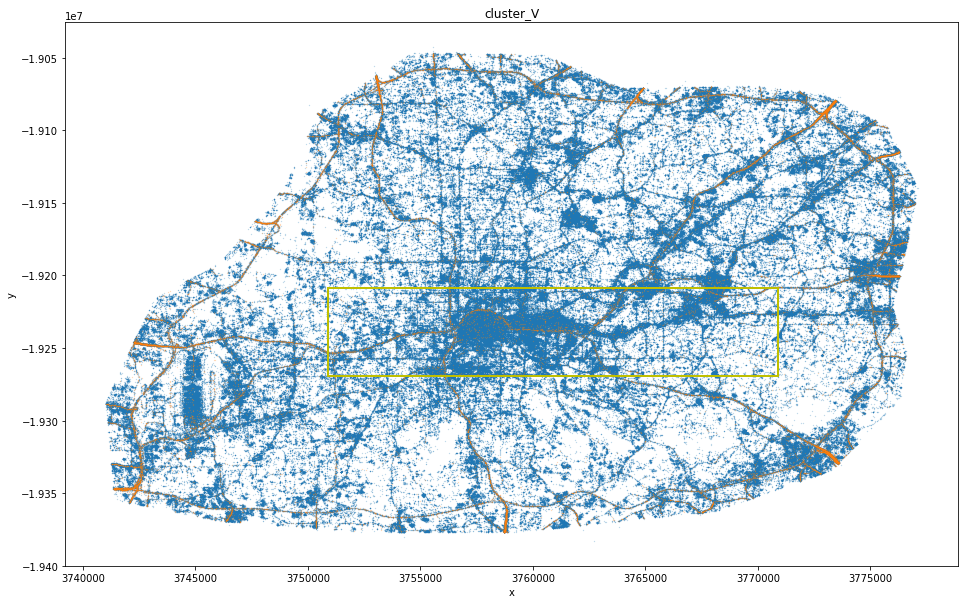

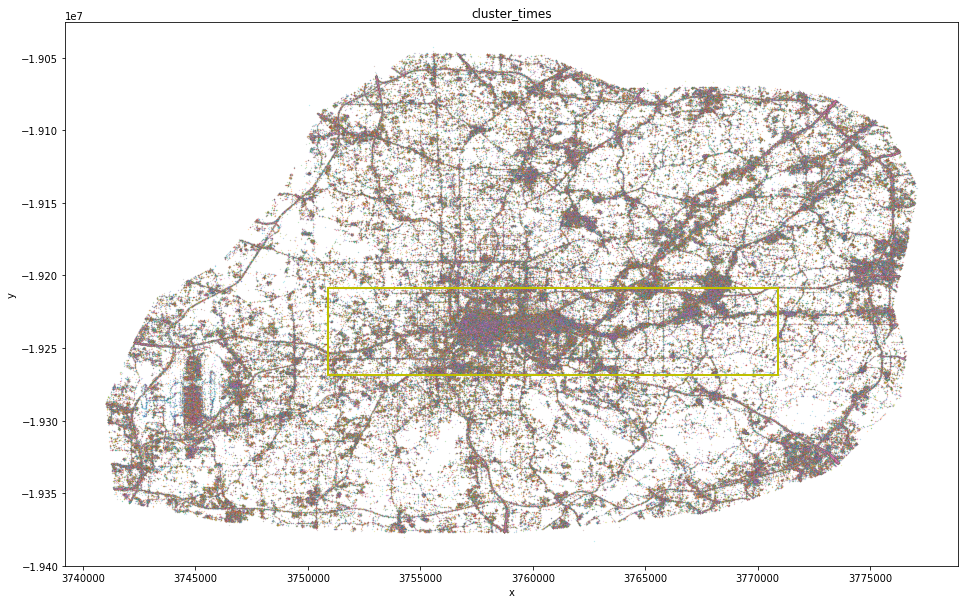

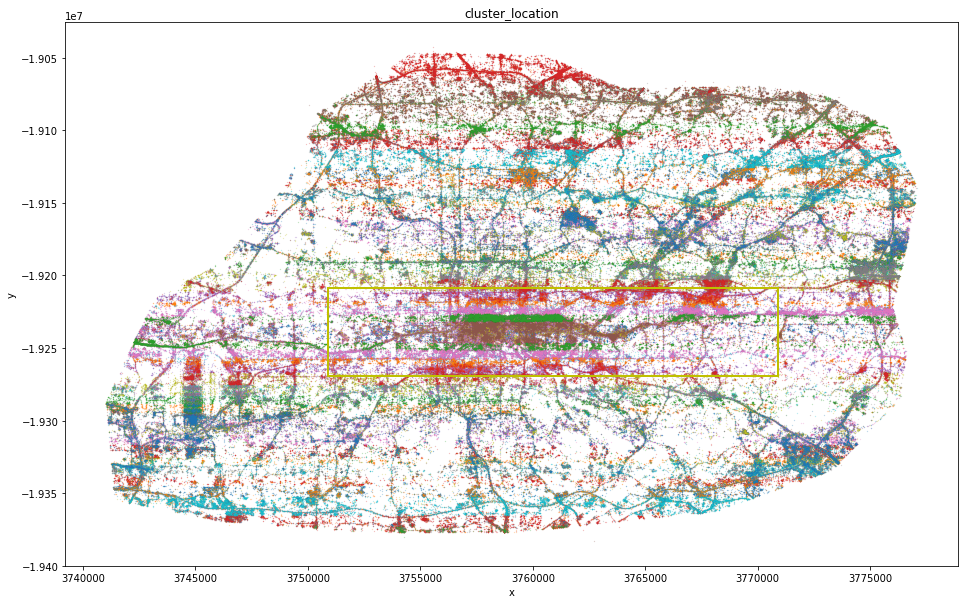

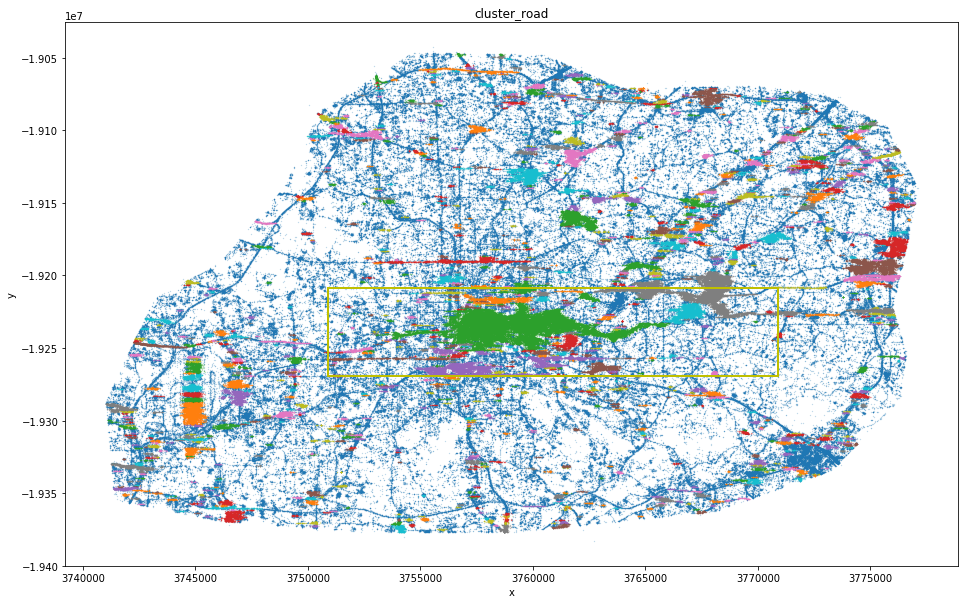

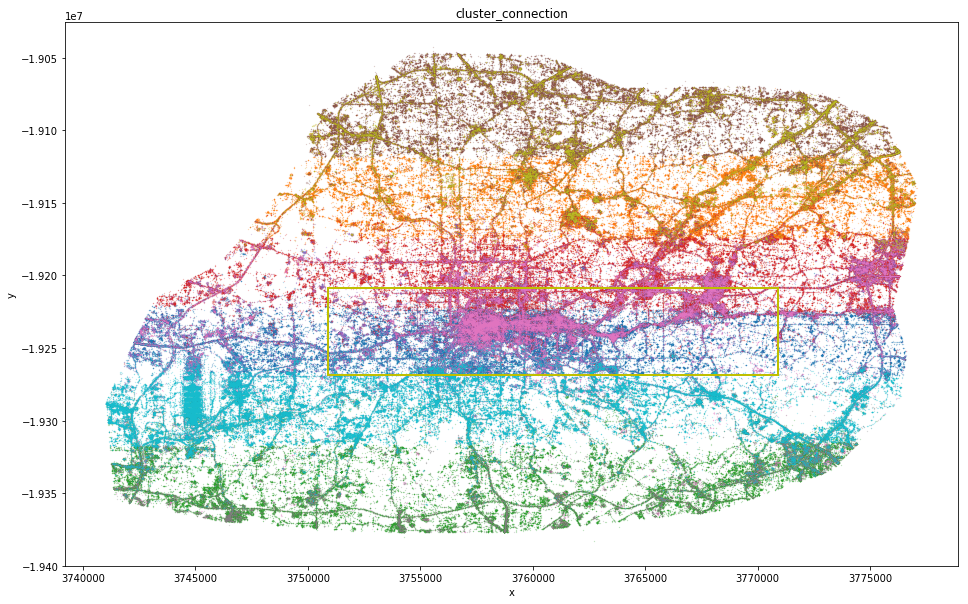

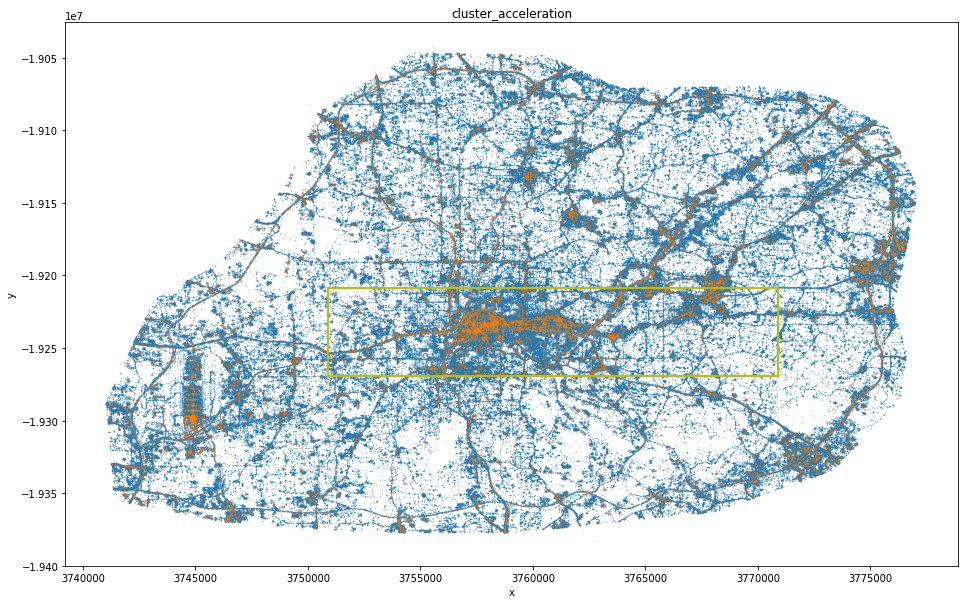

In [9]:
for col in new_columns:
    plot_clusters(col)

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983684 entries, 0 to 202935
Data columns (total 31 columns):
time_entry              983684 non-null int64
time_exit               983684 non-null int64
vmax                    311474 non-null float64
vmin                    311474 non-null float64
vmean                   328137 non-null float64
x_entry                 983684 non-null float64
y_entry                 983684 non-null float64
first                   983684 non-null bool
last                    983684 non-null bool
x_req                   983684 non-null float64
y_req                   983684 non-null float64
x_start                 983684 non-null float64
y_start                 983684 non-null float64
distance                983684 non-null float64
time_start              983684 non-null int64
time_delta              983684 non-null int64
time_total              983684 non-null int64
city_start              983684 non-null bool
city_now                983684 non-null bool

927351 32779
[1]	valid's binary_logloss: 0.603034	valid's f1: 0
[2]	valid's binary_logloss: 0.594934	valid's f1: 0
[3]	valid's binary_logloss: 0.587047	valid's f1: 0
[4]	valid's binary_logloss: 0.579356	valid's f1: 0
[5]	valid's binary_logloss: 0.57186	valid's f1: 0
[6]	valid's binary_logloss: 0.564545	valid's f1: 0
[7]	valid's binary_logloss: 0.557407	valid's f1: 0
[8]	valid's binary_logloss: 0.550437	valid's f1: 0
[9]	valid's binary_logloss: 0.543619	valid's f1: 0
[10]	valid's binary_logloss: 0.53696	valid's f1: 0
[11]	valid's binary_logloss: 0.530454	valid's f1: 0
[12]	valid's binary_logloss: 0.524086	valid's f1: 0
[13]	valid's binary_logloss: 0.517859	valid's f1: 0
[14]	valid's binary_logloss: 0.511759	valid's f1: 0
[15]	valid's binary_logloss: 0.50579	valid's f1: 0
[16]	valid's binary_logloss: 0.499946	valid's f1: 0
[17]	valid's binary_logloss: 0.494221	valid's f1: 0
[18]	valid's binary_logloss: 0.488615	valid's f1: 0
[19]	valid's binary_logloss: 0.483118	valid's f1: 0
[20]	valid'

[144]	valid's binary_logloss: 0.183865	valid's f1: 0.92974
[145]	valid's binary_logloss: 0.182884	valid's f1: 0.929831
[146]	valid's binary_logloss: 0.181917	valid's f1: 0.929933
[147]	valid's binary_logloss: 0.180962	valid's f1: 0.930029
[148]	valid's binary_logloss: 0.180016	valid's f1: 0.930114
[149]	valid's binary_logloss: 0.17908	valid's f1: 0.9302
[150]	valid's binary_logloss: 0.178161	valid's f1: 0.930267
[151]	valid's binary_logloss: 0.177246	valid's f1: 0.930356
[152]	valid's binary_logloss: 0.176333	valid's f1: 0.930448
[153]	valid's binary_logloss: 0.175433	valid's f1: 0.930504
[154]	valid's binary_logloss: 0.174541	valid's f1: 0.930592
[155]	valid's binary_logloss: 0.173661	valid's f1: 0.930677
[156]	valid's binary_logloss: 0.172788	valid's f1: 0.930733
[157]	valid's binary_logloss: 0.171928	valid's f1: 0.930789
[158]	valid's binary_logloss: 0.171077	valid's f1: 0.930856
[159]	valid's binary_logloss: 0.17023	valid's f1: 0.930972
[160]	valid's binary_logloss: 0.169399	valid'

[282]	valid's binary_logloss: 0.109492	valid's f1: 0.939094
[283]	valid's binary_logloss: 0.109214	valid's f1: 0.939125
[284]	valid's binary_logloss: 0.10894	valid's f1: 0.939179
[285]	valid's binary_logloss: 0.108667	valid's f1: 0.939248
[286]	valid's binary_logloss: 0.108395	valid's f1: 0.939302
[287]	valid's binary_logloss: 0.108126	valid's f1: 0.93934
[288]	valid's binary_logloss: 0.107862	valid's f1: 0.939396
[289]	valid's binary_logloss: 0.107594	valid's f1: 0.939432
[290]	valid's binary_logloss: 0.107332	valid's f1: 0.939486
[291]	valid's binary_logloss: 0.10707	valid's f1: 0.939613
[292]	valid's binary_logloss: 0.10681	valid's f1: 0.939679
[293]	valid's binary_logloss: 0.106553	valid's f1: 0.939718
[294]	valid's binary_logloss: 0.106304	valid's f1: 0.939811
[295]	valid's binary_logloss: 0.106053	valid's f1: 0.939851
[296]	valid's binary_logloss: 0.105807	valid's f1: 0.93993
[297]	valid's binary_logloss: 0.105561	valid's f1: 0.940005
[298]	valid's binary_logloss: 0.105312	valid'

[418]	valid's binary_logloss: 0.0841004	valid's f1: 0.947901
[419]	valid's binary_logloss: 0.0839698	valid's f1: 0.947971
[420]	valid's binary_logloss: 0.0838451	valid's f1: 0.948041
[421]	valid's binary_logloss: 0.0837188	valid's f1: 0.948094
[422]	valid's binary_logloss: 0.0835952	valid's f1: 0.948139
[423]	valid's binary_logloss: 0.0834708	valid's f1: 0.948197
[424]	valid's binary_logloss: 0.0833501	valid's f1: 0.948286
[425]	valid's binary_logloss: 0.0832287	valid's f1: 0.948358
[426]	valid's binary_logloss: 0.0831046	valid's f1: 0.948449
[427]	valid's binary_logloss: 0.0829792	valid's f1: 0.948507
[428]	valid's binary_logloss: 0.0828557	valid's f1: 0.948589
[429]	valid's binary_logloss: 0.0827332	valid's f1: 0.948645
[430]	valid's binary_logloss: 0.0826112	valid's f1: 0.948734
[431]	valid's binary_logloss: 0.0824889	valid's f1: 0.948791
[432]	valid's binary_logloss: 0.0823673	valid's f1: 0.948871
[433]	valid's binary_logloss: 0.0822494	valid's f1: 0.948935
[434]	valid's binary_log

[553]	valid's binary_logloss: 0.0703845	valid's f1: 0.957365
[554]	valid's binary_logloss: 0.070305	valid's f1: 0.957429
[555]	valid's binary_logloss: 0.0702242	valid's f1: 0.957521
[556]	valid's binary_logloss: 0.0701375	valid's f1: 0.957588
[557]	valid's binary_logloss: 0.0700605	valid's f1: 0.957681
[558]	valid's binary_logloss: 0.0699838	valid's f1: 0.957761
[559]	valid's binary_logloss: 0.0699075	valid's f1: 0.957811
[560]	valid's binary_logloss: 0.069828	valid's f1: 0.95785
[561]	valid's binary_logloss: 0.0697463	valid's f1: 0.957914
[562]	valid's binary_logloss: 0.0696591	valid's f1: 0.958024
[563]	valid's binary_logloss: 0.0695703	valid's f1: 0.958089
[564]	valid's binary_logloss: 0.0694848	valid's f1: 0.958159
[565]	valid's binary_logloss: 0.069408	valid's f1: 0.95825
[566]	valid's binary_logloss: 0.0693191	valid's f1: 0.958322
[567]	valid's binary_logloss: 0.0692367	valid's f1: 0.958418
[568]	valid's binary_logloss: 0.0691563	valid's f1: 0.958503
[569]	valid's binary_logloss:

[688]	valid's binary_logloss: 0.0611143	valid's f1: 0.966743
[689]	valid's binary_logloss: 0.0610518	valid's f1: 0.966828
[690]	valid's binary_logloss: 0.060991	valid's f1: 0.966892
[691]	valid's binary_logloss: 0.0609305	valid's f1: 0.966942
[692]	valid's binary_logloss: 0.0608655	valid's f1: 0.967027
[693]	valid's binary_logloss: 0.0608042	valid's f1: 0.967104
[694]	valid's binary_logloss: 0.0607413	valid's f1: 0.967157
[695]	valid's binary_logloss: 0.060682	valid's f1: 0.967236
[696]	valid's binary_logloss: 0.0606205	valid's f1: 0.967338
[697]	valid's binary_logloss: 0.0605624	valid's f1: 0.967411
[698]	valid's binary_logloss: 0.060499	valid's f1: 0.967489
[699]	valid's binary_logloss: 0.0604463	valid's f1: 0.967565
[700]	valid's binary_logloss: 0.0603908	valid's f1: 0.967642
[701]	valid's binary_logloss: 0.0603302	valid's f1: 0.967711
[702]	valid's binary_logloss: 0.0602704	valid's f1: 0.967773
[703]	valid's binary_logloss: 0.060209	valid's f1: 0.967875
[704]	valid's binary_logloss

[29]	valid's binary_logloss: 0.420418	valid's f1: 0
[30]	valid's binary_logloss: 0.416033	valid's f1: 0
[31]	valid's binary_logloss: 0.411715	valid's f1: 0
[32]	valid's binary_logloss: 0.407458	valid's f1: 0
[33]	valid's binary_logloss: 0.403287	valid's f1: 0
[34]	valid's binary_logloss: 0.399179	valid's f1: 0
[35]	valid's binary_logloss: 0.395153	valid's f1: 0.000880392
[36]	valid's binary_logloss: 0.391181	valid's f1: 0.696811
[37]	valid's binary_logloss: 0.387276	valid's f1: 0.740491
[38]	valid's binary_logloss: 0.383436	valid's f1: 0.763612
[39]	valid's binary_logloss: 0.379662	valid's f1: 0.782599
[40]	valid's binary_logloss: 0.375943	valid's f1: 0.797109
[41]	valid's binary_logloss: 0.372275	valid's f1: 0.808694
[42]	valid's binary_logloss: 0.368677	valid's f1: 0.819313
[43]	valid's binary_logloss: 0.365129	valid's f1: 0.828105
[44]	valid's binary_logloss: 0.361636	valid's f1: 0.835446
[45]	valid's binary_logloss: 0.358199	valid's f1: 0.841779
[46]	valid's binary_logloss: 0.35481

[170]	valid's binary_logloss: 0.140049	valid's f1: 0.952565
[171]	valid's binary_logloss: 0.139188	valid's f1: 0.952933
[172]	valid's binary_logloss: 0.138334	valid's f1: 0.953074
[173]	valid's binary_logloss: 0.137488	valid's f1: 0.95361
[174]	valid's binary_logloss: 0.136645	valid's f1: 0.953851
[175]	valid's binary_logloss: 0.135823	valid's f1: 0.95438
[176]	valid's binary_logloss: 0.135003	valid's f1: 0.954591
[177]	valid's binary_logloss: 0.134188	valid's f1: 0.954951
[178]	valid's binary_logloss: 0.133381	valid's f1: 0.955262
[179]	valid's binary_logloss: 0.132577	valid's f1: 0.955469
[180]	valid's binary_logloss: 0.131779	valid's f1: 0.955707
[181]	valid's binary_logloss: 0.130991	valid's f1: 0.955939
[182]	valid's binary_logloss: 0.130204	valid's f1: 0.956173
[183]	valid's binary_logloss: 0.129423	valid's f1: 0.956764
[184]	valid's binary_logloss: 0.128653	valid's f1: 0.956932
[185]	valid's binary_logloss: 0.127885	valid's f1: 0.957194
[186]	valid's binary_logloss: 0.127127	val

[307]	valid's binary_logloss: 0.0659342	valid's f1: 0.988106
[308]	valid's binary_logloss: 0.0655982	valid's f1: 0.988169
[309]	valid's binary_logloss: 0.065267	valid's f1: 0.9882
[310]	valid's binary_logloss: 0.0649414	valid's f1: 0.988612
[311]	valid's binary_logloss: 0.064619	valid's f1: 0.988866
[312]	valid's binary_logloss: 0.0642952	valid's f1: 0.989086
[313]	valid's binary_logloss: 0.0639769	valid's f1: 0.98934
[314]	valid's binary_logloss: 0.0636598	valid's f1: 0.989499
[315]	valid's binary_logloss: 0.0633404	valid's f1: 0.98972
[316]	valid's binary_logloss: 0.0630185	valid's f1: 0.989941
[317]	valid's binary_logloss: 0.0627056	valid's f1: 0.990162
[318]	valid's binary_logloss: 0.0623913	valid's f1: 0.990381
[319]	valid's binary_logloss: 0.0620866	valid's f1: 0.99054
[320]	valid's binary_logloss: 0.0617791	valid's f1: 0.990729
[321]	valid's binary_logloss: 0.0614682	valid's f1: 0.990886
[322]	valid's binary_logloss: 0.0611665	valid's f1: 0.990917
[323]	valid's binary_logloss: 0

[445]	valid's binary_logloss: 0.0341556	valid's f1: 0.999497
[446]	valid's binary_logloss: 0.033998	valid's f1: 0.99956
[447]	valid's binary_logloss: 0.0338409	valid's f1: 0.99956
[448]	valid's binary_logloss: 0.0336873	valid's f1: 0.99956
[449]	valid's binary_logloss: 0.0335351	valid's f1: 0.999591
[450]	valid's binary_logloss: 0.0333818	valid's f1: 0.999623
[451]	valid's binary_logloss: 0.0332353	valid's f1: 0.999623
[452]	valid's binary_logloss: 0.0330863	valid's f1: 0.999654
[453]	valid's binary_logloss: 0.032934	valid's f1: 0.999654
[454]	valid's binary_logloss: 0.0327901	valid's f1: 0.999654
[455]	valid's binary_logloss: 0.0326393	valid's f1: 0.999654
[456]	valid's binary_logloss: 0.0324949	valid's f1: 0.999654
[457]	valid's binary_logloss: 0.0323512	valid's f1: 0.999654
[458]	valid's binary_logloss: 0.0322058	valid's f1: 0.999654
[459]	valid's binary_logloss: 0.032059	valid's f1: 0.999685
[460]	valid's binary_logloss: 0.0319136	valid's f1: 0.999685
[461]	valid's binary_logloss: 

[591]	valid's binary_logloss: 0.0177504	valid's f1: 1
[592]	valid's binary_logloss: 0.0176746	valid's f1: 1
[593]	valid's binary_logloss: 0.0176031	valid's f1: 1
[594]	valid's binary_logloss: 0.0175199	valid's f1: 1
[595]	valid's binary_logloss: 0.0174376	valid's f1: 1
[596]	valid's binary_logloss: 0.0173547	valid's f1: 1
[597]	valid's binary_logloss: 0.0172739	valid's f1: 1
[598]	valid's binary_logloss: 0.0171912	valid's f1: 1
[599]	valid's binary_logloss: 0.0171092	valid's f1: 1
[600]	valid's binary_logloss: 0.0170398	valid's f1: 1
[601]	valid's binary_logloss: 0.0169594	valid's f1: 1
[602]	valid's binary_logloss: 0.0168923	valid's f1: 1
[603]	valid's binary_logloss: 0.0168242	valid's f1: 1
[604]	valid's binary_logloss: 0.0167448	valid's f1: 1
[605]	valid's binary_logloss: 0.0166691	valid's f1: 1
[606]	valid's binary_logloss: 0.0166019	valid's f1: 1
[607]	valid's binary_logloss: 0.016536	valid's f1: 1
[608]	valid's binary_logloss: 0.0164689	valid's f1: 1
[609]	valid's binary_logloss:

[743]	valid's binary_logloss: 0.00919518	valid's f1: 1
[744]	valid's binary_logloss: 0.00915974	valid's f1: 1
[745]	valid's binary_logloss: 0.0091178	valid's f1: 1
[746]	valid's binary_logloss: 0.00907939	valid's f1: 1
[747]	valid's binary_logloss: 0.00903805	valid's f1: 1
[748]	valid's binary_logloss: 0.00900224	valid's f1: 1
[749]	valid's binary_logloss: 0.00896215	valid's f1: 1
[750]	valid's binary_logloss: 0.00891975	valid's f1: 1
[751]	valid's binary_logloss: 0.00888493	valid's f1: 1
[752]	valid's binary_logloss: 0.00884808	valid's f1: 1
[753]	valid's binary_logloss: 0.00880964	valid's f1: 1
[754]	valid's binary_logloss: 0.00877684	valid's f1: 1
[755]	valid's binary_logloss: 0.00873742	valid's f1: 1
[756]	valid's binary_logloss: 0.00869927	valid's f1: 1
[757]	valid's binary_logloss: 0.00865659	valid's f1: 1
[758]	valid's binary_logloss: 0.00861514	valid's f1: 1
[759]	valid's binary_logloss: 0.00857294	valid's f1: 1
[760]	valid's binary_logloss: 0.00854044	valid's f1: 1
[761]	valid

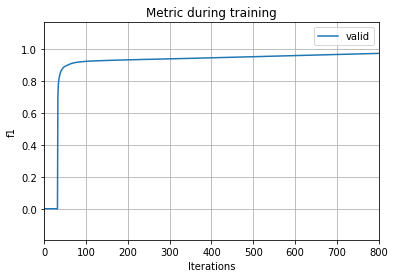

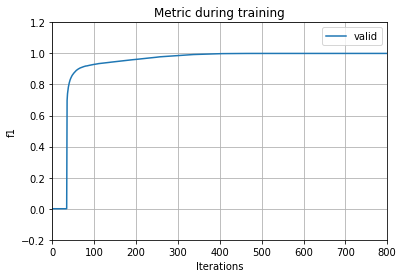

In [20]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from random import randint

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.01,
    'num_boost_round':800,
    'num_leaves' : 1000,
    'metric': 'binary_logloss',
    'num_threads':8,
    'boosting':'gbdt',
    'categorical_feature':[7,8,17,18,19,25,26,27,28,29,30]
    }

def naklastry(c_vec):
    train_vec = x_train[c_vec].values
    test_vec = x_test[c_vec].values
    pred = pd.DataFrame({'c':test_vec,'target':test_vec})
    labels=list(np.unique(pred['c'].values))

    for c in labels:
        xc_train=x_train[train_vec==c]
        yc_train=y_train[train_vec==c].y.values
        xc_test=x_test[test_vec==c]
        if len(xc_test)==0:
            continue
        print(len(xc_train),len(xc_test))
        
        target, score = lgbm_trainder(xc_train, yc_train, xc_test)
        
        #Prediction
        def add(row,c):
            if row['c']==c:
                return target.pop(0)
            else:
                return row.target
            
        pred['target'] = pred.apply(lambda x: add(x,c), axis=1)
                 
        print('done:',c)
    return pred.target.values


def lgbm_trainder(X_train, Y_train, X_test):
    
    X_val = X_train
    Y_val = Y_train
    d_train = lgb.Dataset(X_train, label=Y_train)
    d_valid = lgb.Dataset(X_val, label=Y_val)
    
    def lgb_f1_score(y_hat, data):
        y_true = data.get_label()
        y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
        return 'f1', f1_score(y_true, y_hat), True
    
    #Learning
    evals_result = {}    
    #params['seed']=seed
    clf = lgb.train(params, d_train,valid_sets=[d_valid], valid_names=['valid'],feval=lgb_f1_score,evals_result=evals_result)   
    lgb.plot_metric(evals_result, metric='f1')
    
    #Prediction
    target=list(clf.predict(X_test))
    
    return target, f1_score(Y_val,np.round(clf.predict(X_val)))

size = 1

city_lgbm_proba = []
city_lgbm_score = []


seeds = []

for i in range(size):
    #s = randint(0,2**32 - 1)
    #seeds.append(s)
    city_lgbm_proba.append( naklastry('cluster_acceleration') )
    
#print(seeds)

In [21]:

lgbm=pd.DataFrame()
for i in range(size):
    lgbm[str(i)]=city_lgbm_proba[i]
#lgbm.to_csv('./output/10/lgbm.csv',index=False)    
lgbm[:20]

0
0   0.010113
1   0.000946
2   0.999764
3   0.004714
4   0.042685
5   0.000120
6   0.999765
7   0.000104
8   0.999708
9   0.076817
10  0.999765
11  0.480079
12  0.057021
13  0.001219
14  0.121892
15  0.327241
16  0.158190
17  0.316914
18  0.000103
19  0.000102

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


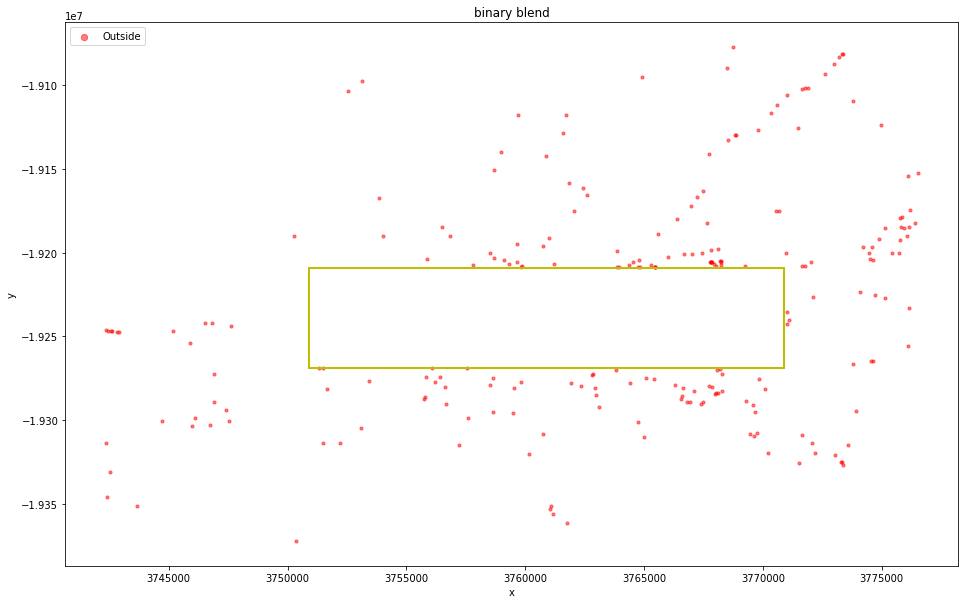

In [14]:

best = pd.read_csv('./output/submission/lgbm_800.csv').target.values
best2 = pd.read_csv('./output/submission/lgbm_blended_2.csv').target.values
city=lgbm.copy()
for col in city.columns:
    city[col]=np.round(city[col].values)
#city['best']=best
#city['best2']=best2
city['target']=np.zeros(len(city))
for col in city.columns:
    city['target']=city['target']+city[col]

def fnc(x):
    if x>=1:
        return 1
    else:
        return 0
city=[fnc(x) for x in city.target.values]

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
#submission.to_csv('./output/10/bb.csv',index=False)    
submission[:20]

plotmap(city,'binary blend')

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


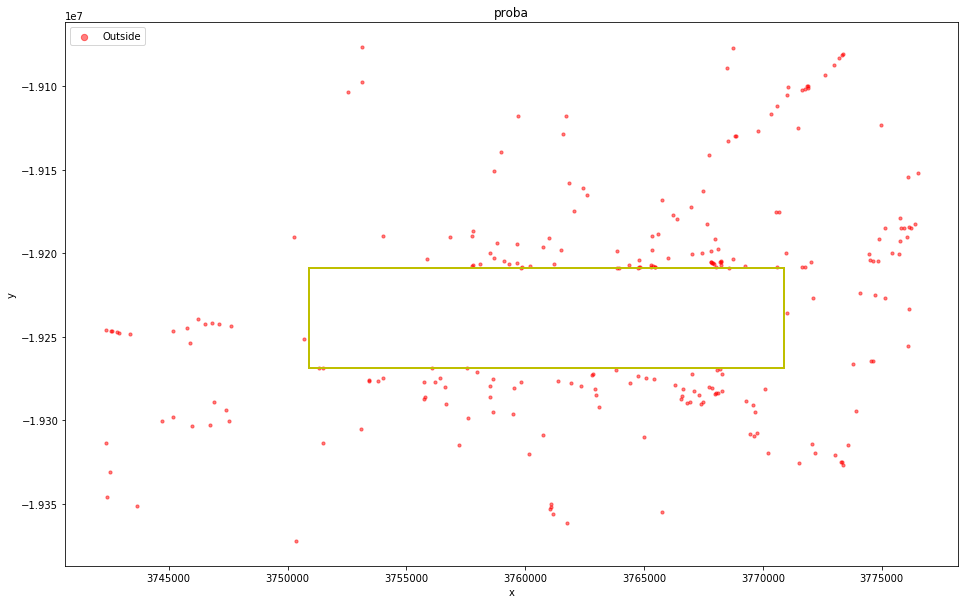

In [22]:
city=lgbm.copy()

target=np.zeros(len(city))
i=0
for col in city.columns:
    target += lgbm[col]
    i += 1
city['target']=target
city['target']/=i

city=np.round(city.target.values)

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
submission.to_csv('./output/10/proba.csv',index=False)    
submission[:20]

plotmap(city,'proba')

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


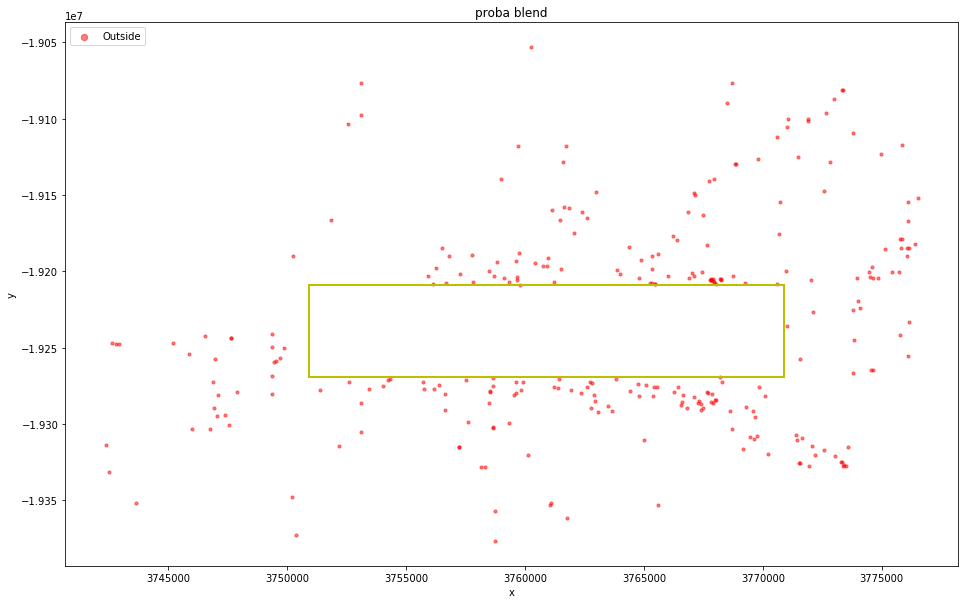

In [31]:
city=lgbm.copy()
target=np.zeros(len(city))
i=0
for col in city.columns:
    target += lgbm[col]
    i += 1
    
target += pd.read_csv('./output/submission/lgbm_blended_2.csv').target.values
i += 1
city['target']=target
city['target']/=i

city=np.round(city.target.values)

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
submission.to_csv('./output/10/proba_blend.csv',index=False)    
submission[:20]

plotmap(city,'proba blend')

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


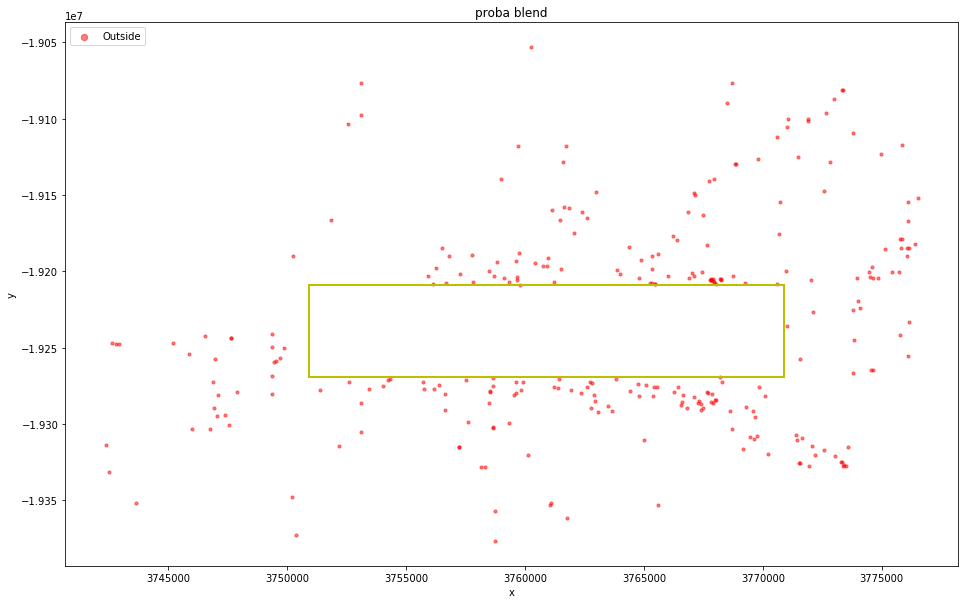

In [32]:
plotmap(best2,'proba blend')